### Question 5: Analysis for Maximum Anomaly Month

In this question, we decided to reproduce the figure 2b that displays the maximum anomaly month.

In [1]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import fsspec

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import xarray as xr
xr.set_options(display_style="html")  # display dataset nicely

import warnings
warnings.simplefilter("ignore")  # filter some warning messages

# code features from https://scitools.org.uk/cartopy/docs/v0.14/matplotlib/feature_interface.html
crs = ccrs.PlateCarree()  # set projection

In [2]:
ds = xr.open_dataset("~/shared/climate-data/ds_hw.nc")
sst = ds['analysed_sst']

In [12]:
#find the mean climatology from 2002 to 2012
mean_climatology = sst.sel(time = slice('2002','2012')).groupby('time.dayofyear').mean(skipna = True)

#find the range of sst data that we are interested in
interested_sst = sst.sel(time=slice('2002', '2016-07')).groupby('time.dayofyear')

#find the maximum anomaly month
max_month = (interested_sst - mean_climatology ).idxmax('time', skipna=True).dt.month


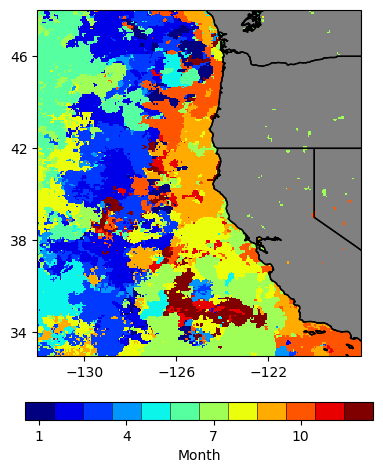

In [33]:
#plot the map
fig = plt.figure(figsize = (10, 6))
ax = plt.subplot(projection =crs)
fig2b = max_month.plot(ax=ax, transform = crs, add_colorbar=False, cmap = 'jet')
ax.set_yticks(range(34, 50, 4))
ax.set_xticks([-130, -126, -122])
ax.set_ylabel('')
ax.set_xlabel('')

ax.coastlines("10m", color="k")
ax.add_feature(cfeature.LAND, color="grey")
ax.add_feature(cfeature.STATES.with_scale("10m"))               
               
#color bar
cbar=fig.colorbar(fig2b, ax=ax, orientation = 'horizontal', shrink = 0.45,
                  pad = 0.1, drawedges = True, boundaries = np.arange(0.5, 13.5))
cbar.set_label('Month')
cbar.set_ticks([1, 4, 7, 10])
plt.show()

#fig.savefig('outputs/hw3_Q05b.png')

The plot shows that the maximum SST anomalies in the offshore and coastal regions had different timing. The combination of all plots in Figure 2 could show the degree, month ,and year of the maximum SST anomaly in a specific location.  